In [1]:
from IPython.display import Image

In [2]:
from astropy import constants, units as u

# Protostellar Evolution

Once a star has formed at the center of our collapsing core, how does it evolve?

When do we decide to call it a 'star'?

When does it hit the 'main sequence'?

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png">

I'm showing the HR diagram now to tell the basic story we're walking through: We made a star, now what does it do before it spends 10 billion years (give or take) on the main sequence?

# Protostellar Evolution

1. Timescales (Kelvin-Helmholtz vs others)
2. Protostellar Structure & Boundary Conditions
3. Deuterium Burning
4. Phases of protostellar evolution

## The Kelvin-Helmholtz timescale

The Kelvin-Helmholtz timescale is the time required to radiate away a star's gravitational energy.

From dimensional analysis, we have:
\begin{equation}
 t_{KH} = \frac{\mathcal{W}}{L}
\end{equation}
where $\mathcal{W}$ is the gravitational energy and $L$ is the star's luminosity.

The gravitational energy is:
\begin{equation}
\mathcal{W} \approx \frac{G M_*^2}{R_*}
\end{equation}
i.e., it is the work done by gas falling from infinity to the star's surface.

For a sun-like star, this is:

\begin{equation}
 t_{KH} = \frac{G M_\odot^2}{R_\odot L_\odot} = 3\times10^{7} \mathrm{yr}
\end{equation}

In [3]:
t_kh = (constants.G * u.M_sun**2 / (u.R_sun * u.L_sun)).to(u.Myr)
t_kh

<Quantity 31.39927676 Myr>

However, for a protostar, the radius and luminosity are both larger, so a reasonable approximation is instead 
\begin{equation}
 t_{KH} = \frac{G M_\odot^2}{10 R_\odot 10 L_\odot} = 3\times10^{5} \mathrm{yr}
\end{equation}

## Interactive questions

What is the Kelvin-Helmholtz timescale for a brown dwarf (assume $M=0.05 \mathrm{M}_\odot$, $R= 1 \mathrm{R}_\odot$, and $L=4 \pi R^2 T^4 \sigma_{SB}$ with $T=500$ K)?

What about for an O-star ($M=50 \mathrm{M}_\odot$, $R=20 \mathrm{R}_\odot$, $T=30,000$ K)?

In [5]:
constants.G.cgs

<Quantity 6.6743e-08 cm3 / (g s2)>

In [6]:
u.M_sun.to(u.g)

1.988409870698051e+33

In [7]:
f"{u.R_sun.to(u.cm):0.3e}"

'6.957e+10'

In [8]:
constants.sigma_sb.cgs

<Quantity 5.67037442e-05 g / (K4 s3)>

In [9]:
u.L_sun.to(u.erg/u.s)

3.8279999999999997e+33

blank slide - next one has answers

In [10]:
tkh_bd = (constants.G * (0.05*u.M_sun)**2 / (1 * u.R_sun * (4*np.pi*(1*u.R_sun)**2*constants.sigma_sb*(500*u.K)**4))).to(u.Myr)
tkh_bd

<Quantity 1394.07441848 Myr>

In [11]:
tkh_o= (constants.G * (50*u.M_sun)**2 / (20 * u.R_sun * (4*np.pi*(20*u.R_sun)**2*constants.sigma_sb*(30000*u.K)**4))).to(u.Myr)
tkh_o

<Quantity 0.01344593 Myr>

The sound-crossing time is the time require for a pressure wave to cross a star.  It is short, much shorter than $t_{KH}$.

It can be approximated as $t_s = R_* / c_s$, where, if we assume the star is in equilibrium between gas pressure and gravity, we can approximate $c_s = \sqrt{GM/R}$, so:
\begin{equation}
t_s = \sqrt{\frac{R^3}{GM}} = 14 \mathrm{h} << t_{kh}
\end{equation}

In [4]:
sound_crossing_time = ((10*u.R_sun)**(3/2) / (constants.G * u.M_sun)**(1/2)).to(u.hour)
sound_crossing_time

<Quantity 13.99183539 h>

Timescale summary
* Protostars are in hydrostatic equilibrium
* They can be modeled as slowly changing from one equilibrium state to another
* $t_{KH} > t_{acc} >> t_s$ for solar-mass stars

# Protostellar Structure

We're going to skip the detailed equations of stellar structure.  They're covered in 17.1.2 of Krumholz.  We'll skip to the questions of what is different between stars and protostars

## Boundary conditions

The key difference between stars & protostars is the difference in boundary conditions, specifically, that protostars are accreting.

# Ram Pressure

Stuff hits the surface hard.  But we never use ram pressure again, so I'm skipping this.

The accretion rate is:
\begin{equation}
\dot{M} = 4\pi r^2 \rho_i v
\end{equation}

The resulting _ram pressure_ $P = \rho_i v_{infall}^2$ at the surface is
\begin{equation}
P(M) = \rho_i v^2 = \frac{\dot{M} v}{4\pi r^2}
\end{equation}


If the incoming gas is in free-fall, then we can set $v = v_{\rm ff} = \sqrt{2GM/R}$, which gives
\begin{equation}
\label{pbound1}
P(M) = \frac{\dot{M}}{4\pi} \sqrt{\frac{2 G M}{R^5}},
\end{equation}
where $M$ is the total stellar mass. 


For a non-accreting star, we have the luminosity
\begin{equation}
L(M) = L_{bb} =4\pi R^2 \sigma_{\rm SB} T(M)^4
\end{equation}

where we're using the notation $T(M)$ to indicate that the temperature depends only on the mass of the star.  The luminosity therefore depends only on the mass and the radius.


while for an accreting star, we have:
\begin{eqnarray}
\label{lbound1}
L(M) & = & L_{\rm bb} + L_{\rm acc, rad} \\
     & = & L_{\rm bb} + L_{\rm acc,max} - L_{\rm acc,adv}
\end{eqnarray}



$L_{\rm bb}$ is the blackbody radiation from the star.



$L_{\rm acc,rad}$ is the energy radiated away from the accretion shock.  $1/4 L_{\rm acc,max} < L_{acc,rad}  < L_{\rm acc,max}$ - the value is unknown and often treated as a free parameter in models.  $L_{\rm acc,rad} = L_{\rm acc,max} - L_{\rm acc,adv}$



$L_{\rm acc,max}$ is the total accretion luminosity.  <span style='font-size:75%'>We add the subscript $_{\rm max}$ because some of the accretion luminosity is lost (radiated away) in the disk before it reaches the star, so $L_{\rm acc,max} = \epsilon L_{\rm acc} = \epsilon G M \dot{M}/R$, with $\epsilon<1$. </span> <span style='font-size:50%'>(Note that this radiative loss in the disk is different from the radiated energy noted above: this is energy lost <i>before</i> it gets to the star, so it adds neither to the stellar luminosity nor the stellar interior energy)</span>


$L_{\rm acc, adv}$ is the the remaining accretion luminosity that is _not_ radiated away and is instead advected to the interior.  This remaining luminosity is what adds entropy to the star and can drive 'bloating' (increase the star's radius).


Summarizing:
   
* $L_{bb}$ is the star's intrinsic luminosity
* $L_{acc}$ is the total energy released as material falls into the star from the core
* $L_{acc,max} = \epsilon L_{acc}$ is the fraction of that energy that makes it to the surface of the star 
  * $(1-\epsilon)L_{acc}$ is radiated away in the disk
* $L_{acc,rad}$ is the luminosity radiated away *at* the accretion shock
* $L_{acc,adv}$ is the energy that is _not_ radiated away but gets advected (mixed in) to the star

# Accretion probably isn't spherical

<img src="graphics/aa540135.f1.gif">

Consequences of non-spherical accretion:

* The boundary condition becomes more star-like (most of the area of the sphere just looks out into empty space)
* $L_{adv} < \frac{3}{4} L_{acc}$ 

* "Hot accretion" is $L_{adv} \approx L_{adv,sph} = 0.1 - 0.75 L_{acc}$ 
* "Cold accretion" is $L_{adv} \approx 10^{-2}-10^{-3} L_{acc}$, i.e., most of the energy is radiated away

These govern the amount of entropy added to the stellar interior, which in turn governs the stellar radius.

**Hot accretion produces bigger protostars.**  This matters especially for massive stars.


<span style='font-size:50%'>[Vorobyov+ 2017](https://ui.adsabs.harvard.edu/#abs/2017A%26A...605A..77V/abstract) is the source I'm using for the definitions; Krumholz has been modified to use a similar definition
</span>

## Why does star size matter?  Why do we care about 'hot-mode' vs 'cold-mode' accretion?





If a star is radiating at a given luminosity, its temperature is controlled by its size.  The Stephan-Boltzmann law:

$$L = 4 \pi R^2 \sigma_{SB} T^4$$

tells us 

$$ T = \left(\frac{L}{4 \pi R^2 \sigma_{SB}}\right)^{1/4}$$

i.e., $T\propto R^{-1/2}$.  So, a bigger star is _cooler_.  Cooler stars are _redder_.



Dust is more optically thick to hotter radiation.  Very hot radiation produces ultraviolet photons and can ionize hydrogen.

# The star has contracted

# Next phase: Nuclear burning

## Deuterium Burning
Main sequence stars burn **hydrogen** into helium to release energy.

Pre-main-sequence stars burn Deuterium.

\begin{equation}
^2\mbox{H} + \,^1\mbox{H}\, \rightarrow \, ^3\mbox{He} + \gamma.
\end{equation}

This reaction begins to occur at an appreciable rate once the temperature reaches $10^6$ K, and the reaction releases $5.5$ MeV per deuterium nucleus burned. (H-burning requires $T>4\times10^6$ K.)

The energy generation rate from Deuterium fusion is:
    
\begin{equation}
\epsilon \approx 
\left\{    
\begin{array}{ll}
0 & T < 10^6\mbox{ K} \\
4.19\times 10^7\, [\mbox{D}/\mbox{H}] \rho_0 T_6^{11.8} \mbox{ erg g}^{-1}\mbox{ s}^{-1}
\qquad & T > 10^6\mbox{ K}
\end{array}
\right.
\end{equation}

where the key number to note is the exponent on temperature: a $2\times$ increase in temperature puts out $3000\times$ more energy!

The equation describing the internal energy of the protostar is:
\begin{equation}
\frac{\partial L}{\partial M_r} = \epsilon - T\frac{\partial s}{\partial t}.
\end{equation}
where $L$ is the luminosity, $M_r$ is the Lagrangian mass coordinate (it is monotonically increasing with radius), $s$ is the  entropy, $T$ is temperature, and $t$ is time.

<div class=fragment>
$\epsilon$ is the additional energy supplied by nuclear burning.
</div>
<div class=fragment>
For a main-sequence star, the right side is just $\epsilon$ - there is no change in specific entropy with time.  The change in  entropy comes only from accretion.
</div>

We have all the ingredients, so we can  solve the equations of protostellar structure numerically.

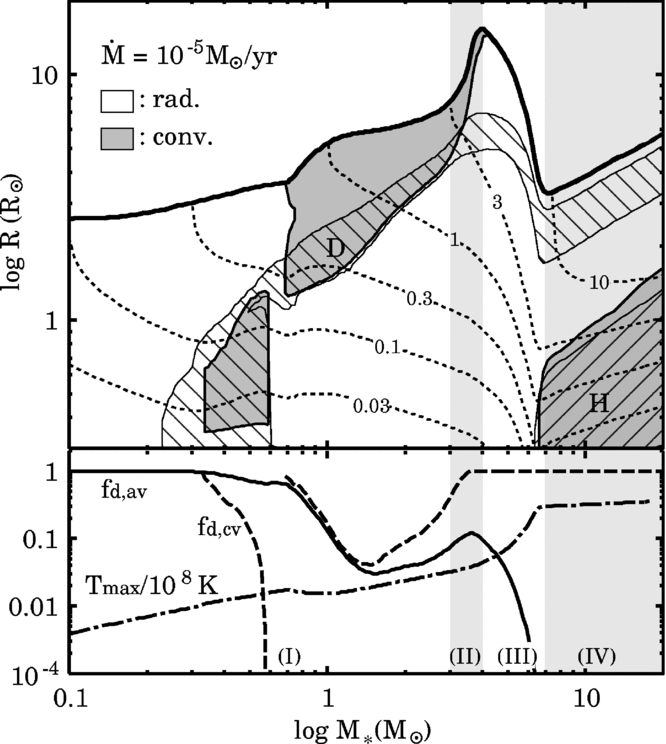

In [12]:
Image("https://s3.amazonaws.com/aasie/images/0004-637X/691/1/823/apj294267f7_hr.gif")

Evolutionary Phases of Protostellar Evolution

1. Initial contraction
2. Deuterium Ignition & Convection
3. Deuterium Exhaustion & Radiative Barrier
4. Swelling
5. Contraction onto Main Sequence


## Initial Contraction ( < 0.2 $M_\odot$)

- <span class=fragment> only source of energy is gravitational potential energy </span>
- <span class=fragment> entropy lost through radiation at accretion shock </span>
- <span class=fragment> hot-mode accretion is self-regulating and converges to a common track: </span>
    - <span class=fragment> if the star starts small, $v_{ff}$ is large, the shock is hotter, more entropy is added, star grows in radius </span>
    - <span class=fragment> if the star starts big, $v_{ff}$ is small, the shock is cooler, less entropy is added, star shrinks in radius </span>
- <span class=fragment> cold-mode accretion: no entropy is added, initial conditions fully determine track </span>

<span class=fragment>(this is the intial phase in fig 17.1, up to M=0.2 M$_\odot$)</span>

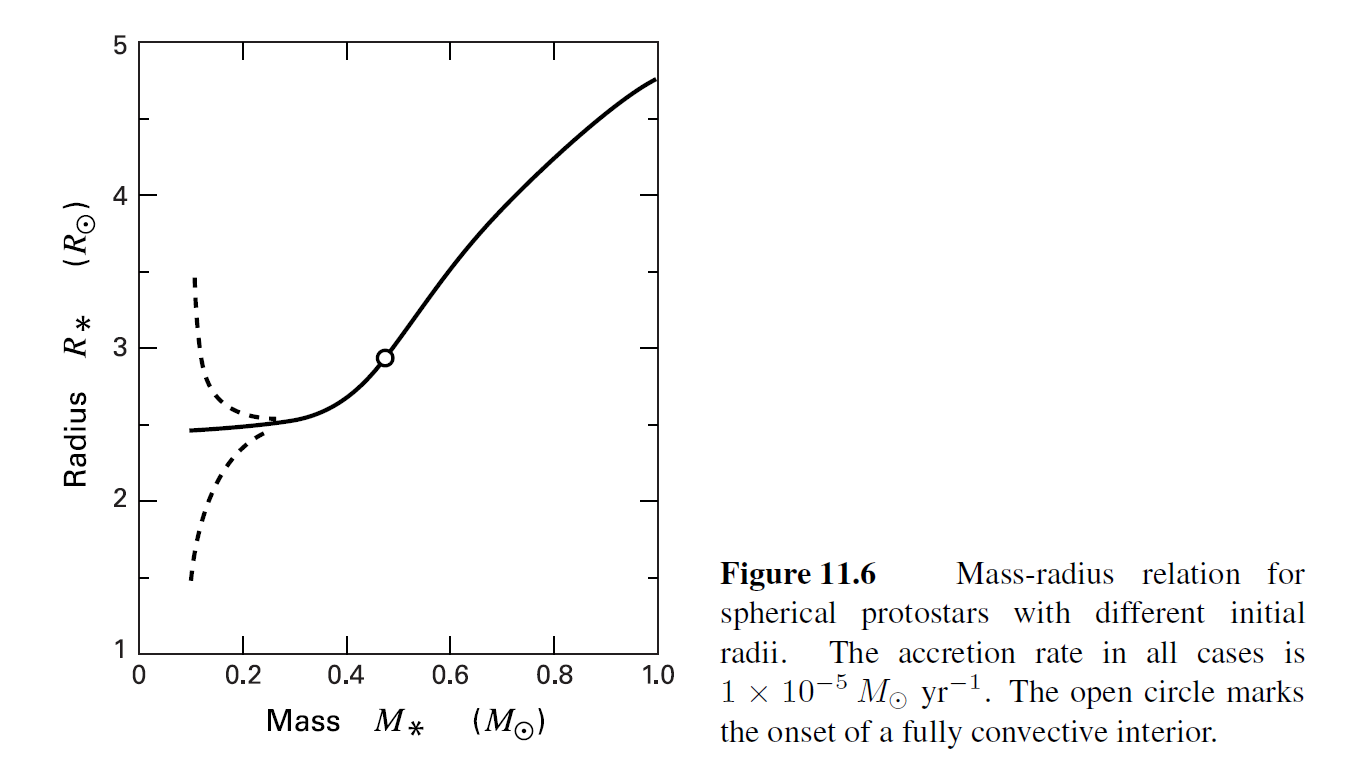

In [13]:
# demo of how hot-mode accretion 'self-regulates' onto a single mass-radius relation
Image('graphics/pallastahler11.6.png')

Mass-radius relation for different models of accretion, where here $\xi=0$ is "cold" accretion and $\xi=0.5$ is "hot".

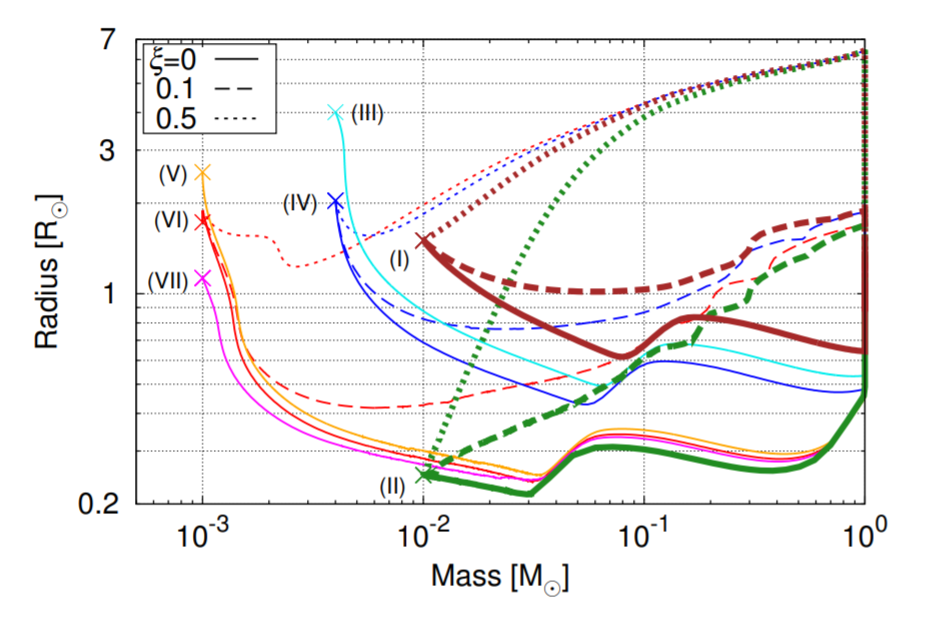

In [14]:
Image("graphics/kunimoto2017_figD.1_massradius.png")

In [ ]:
# Fig. D.1. Evolution of radius as a function of mass for accreting stars
# with M˙ = 10−5 M/yr for different initial conditions and different values of ξ.
# The crosses (with corresponding I to VII labels) correspond to
# the initial conditions chosen to span a range of specific entropies. The
# different initial radii are 1.5 R (case I), 0.25 R (II), 4.0 R (III), 2.0 R
# (IV), 2.5 R (V), 1.8 R (VI), and 1.1 R (VII). Solid, dashed, and dotted lines
# indi,cate the evolution with ξ = 0, 0.1 and 0.5, respectively.
# The evolution for cases (I) and (II) correspond to those adopted in the
# present manuscript and are highlighted with thicker lines.

## Deuterium Ignition & Convection (0.25-0.7 $M_\odot$)

<ul>
    
<li class=fragment> Protostar grows in mass, $T_c$ increases: larger mass requires higher T to be in hydrostatic equilibrium
<li class=fragment> D-burning happens once $T_c$ approaches $\sim10^6$ K.  Rate $\dot{E}\propto T^{11.8}$
<li class=fragment> "Thermostat" effect: $T_c$ locks at $\sim10^6$, because any slight increase above that expands the star, adiabatically cooling back down
<li class=fragment> Outer radius increases w/mass.  Core contraction halts.
<li class=fragment> Convection starts: required if luminosity exceeds that what can be transported by radiation
</ul>


"Nearly linear" mass-radius relation during D-burning

<img src="graphics/pallastahler11.8.png">

<img src="graphics/krumholzfig17.1_deutign.png" style='max-height: 50%'>

# Convection

If there is too much energy being produced for radiation to carry it outward, convection - physical movement of gas - carries that energy out.

### Convection

Before deuterium burning, there is more entropy $s$ in outer layers than inner layers b/c $v_{infall}$ increases as the mass increases (and the radius is about the same).  $ds/dr > 0$ is stable against convection.



$\epsilon$ is now positive b/c deuterium is burning.  
\begin{equation}
\frac{\partial L}{\partial M_r} = \epsilon - T\frac{\partial s}{\partial t}.
\end{equation}
so the entropy at the center starts to increase.

Convection drags fresh deuterium from outer layers inward to provide a continuous source of fuel.

Convection can start without deuterium burning: high accretion rates can also drive core heating and the entropy inversion required to start convection.

<img src="graphics/krumholzfig17.1_deutign.png" style='max-height: 50%'>

# Deuterium exhaustion, formation of radiative barrier (0.6-3 $M_\odot$)

Deuterium burning releases 5.5 MeV per atom, while H yields 7 MeV per atom.

However, $X_D \sim 2\times10^{-5}$, so the D-burning timescale is $10^5$ times shorter than the H-burning main sequence.

\begin{equation}
t_{\rm D} = \frac{[\mbox{D}/\mbox{H}] \Delta E_{\rm D} M}{m_{\rm H} L} = 1.5\times 10^5 M_{0} L_1^{-1}\mbox{ yr}
\end{equation}
$M_0 = (M_* / M_\odot)$, $L_1 = (L_*/10^1 L_\odot)$

This lifetime is short compared to the lifetime of a star, but comparable to the formation timescale for a star, so stars may be D-burning during the entire accreting stage as a protostar.

Deuterium burning doesn't run out the total deuterium supply in the star because fresh deuterium is brought in along the accretion flow.



Once deuterium starts to run low and the energy generation in the core decreases, the core starts to contract further, leading to higher temperature.  

The opacity goes down as temperature goes up, with $\kappa_R \propto \rho T^{-3.5}$ ([Kramer's opacity law](https://en.wikipedia.org/wiki/Kramers%27_opacity_law) applies when the opacity is dominated by free-free or bound-free transitions, which is true in a highly ionized medium like a star).

The low opacity allows radiation to efficiently transfer energy outward, which shuts off convection.

Turning off convection stops the flow of fresh deuterium inward, creating a _radiative barrier_.  

The remaining D is rapidly consumed.

The simultaneous shutoff of convection and final consumption of deuterium leads to the Deuterium shell-burning phase.

<img src="graphics/pallastahler11.20.png">

<img src="graphics/krumholzfig17.1_deutex.png">

# Swelling (3-4 $M_\odot$)

We're talking about stars more massive than the sun at this point.

The formation of the radiative barrier and the increase in internal temperature drives out a wave of decreasing opacity and more efficient luminosity transport, which pushes outward until it reaches the stellar surface, at which point the star expands rapidly.

<img src="graphics/krumholzfig17.1_nocap.png">

# Contraction onto the main sequence (>4 $M_\odot$)

After the entropy wave reaches the surface, the core can contract further.

The main sequence lifetime starts once core hydrogen burning is initiated.

<img src="graphics/krumholzfig17.1_contraction.png">

# Aside: High mass stars


High-mass stars ($M>5-15 M_\odot$ for this statement) accrete most of their mass while on the main sequence.

[Hosokawa & Omukai 2009](https://ui.adsabs.harvard.edu/abs/2009ApJ...691..823H/abstract) run these same calculations for boosted accretion rates.  What changes?

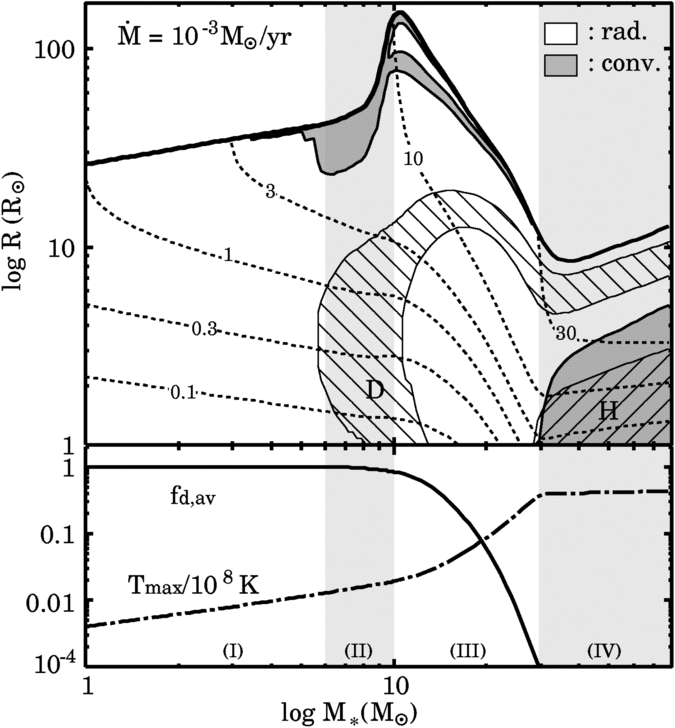

In [15]:
Image("https://s3.amazonaws.com/aasie/images/0004-637X/691/1/823/apj294267f2_hr.gif")

More rapidly accreting stars bloat much larger!

There are physical reasons to expect an upper mass limit on stars at any given accretion rate.  We'll go into these more later.

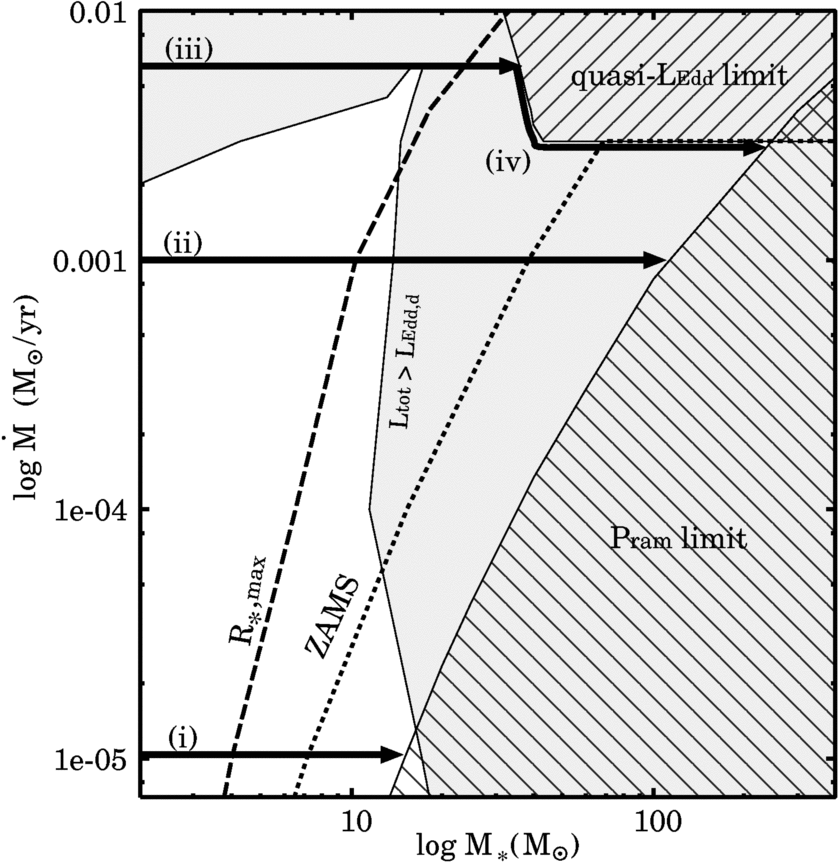

In [16]:
Image("https://s3.amazonaws.com/aasie/images/0004-637X/691/1/823/apj294267f19_hr.gif")